In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dataset = np.empty((0,2))

with open("data\sunspot.txt", "r") as file:
    data = file.readlines()
    for i,line in enumerate(data):
        if i>3 and i<3080:
            words = line.split(' ')
            if len(words) != 1: 
                #print(float(words[-1][:-1]))
                dataset = np.append(dataset, [[i-3,float(words[-1][:-1])]], axis=0)
    print(dataset)
    
    X = dataset[:,0]
    Y = dataset[:,1]

[[1.000e+00 6.300e+01]
 [2.000e+00 7.000e+01]
 [3.000e+00 5.600e+01]
 ...
 [3.074e+03 1.800e+01]
 [3.075e+03 3.100e+01]
 [3.076e+03 2.900e+01]]


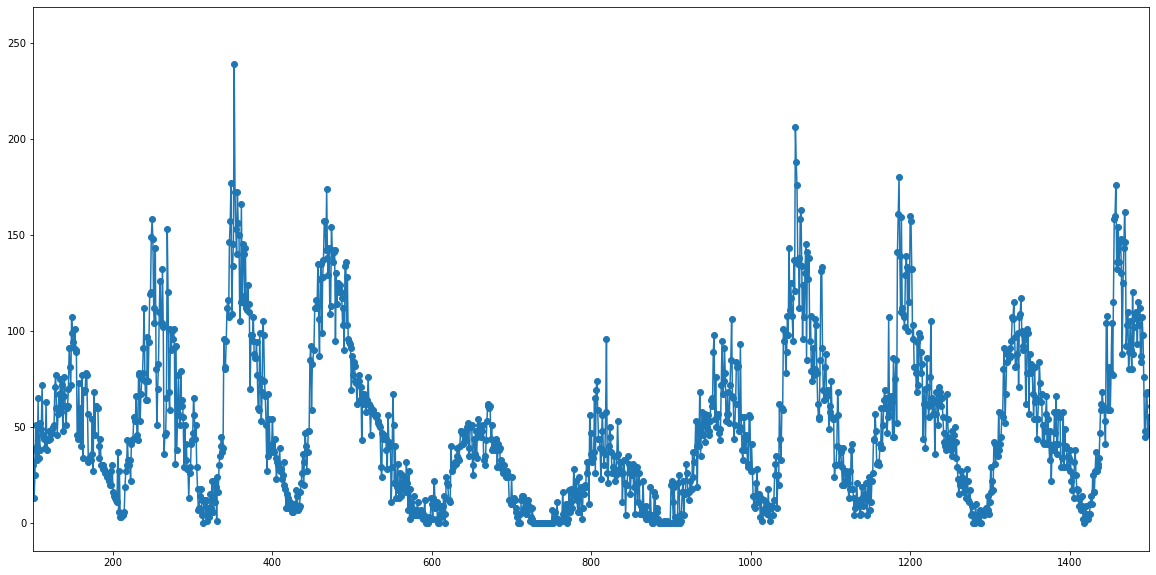

In [19]:
plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.xlim(100,1500)
plt.show()

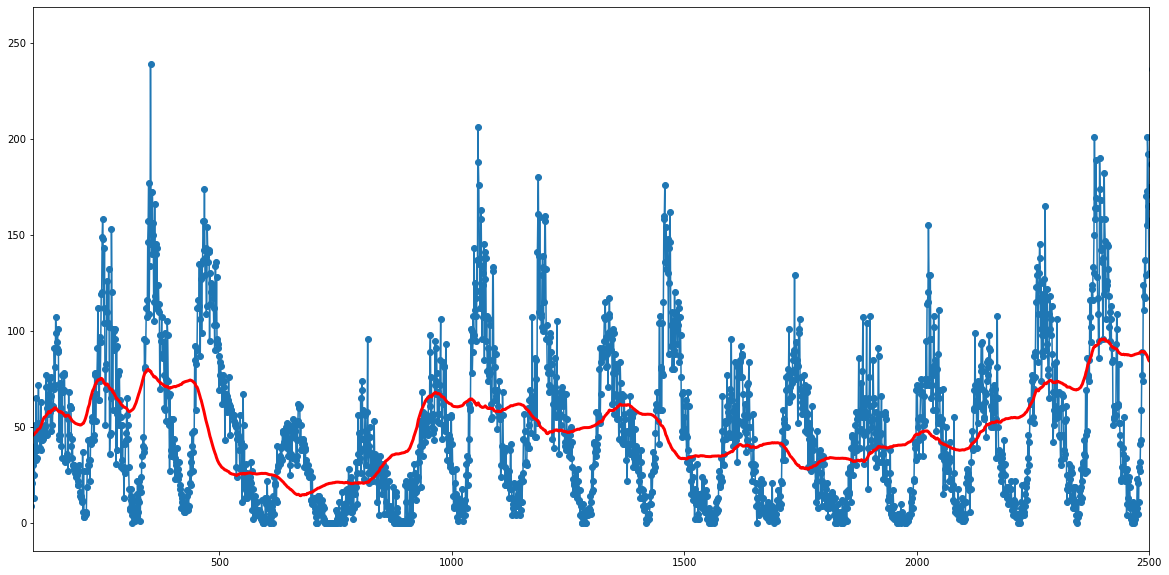

In [31]:
def moving_average(series, windowsize):
    result = [series[0]]
    for n in range(0, len(series)-windowsize):
        result.append(sum(series[n+i] for i in range(windowsize))/float(windowsize))
    return result 

Y_av = moving_average(Y,132)


plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X[:len(Y_av)], Y_av, c="red", linewidth=3)
plt.xlim(100,2500)
plt.show()

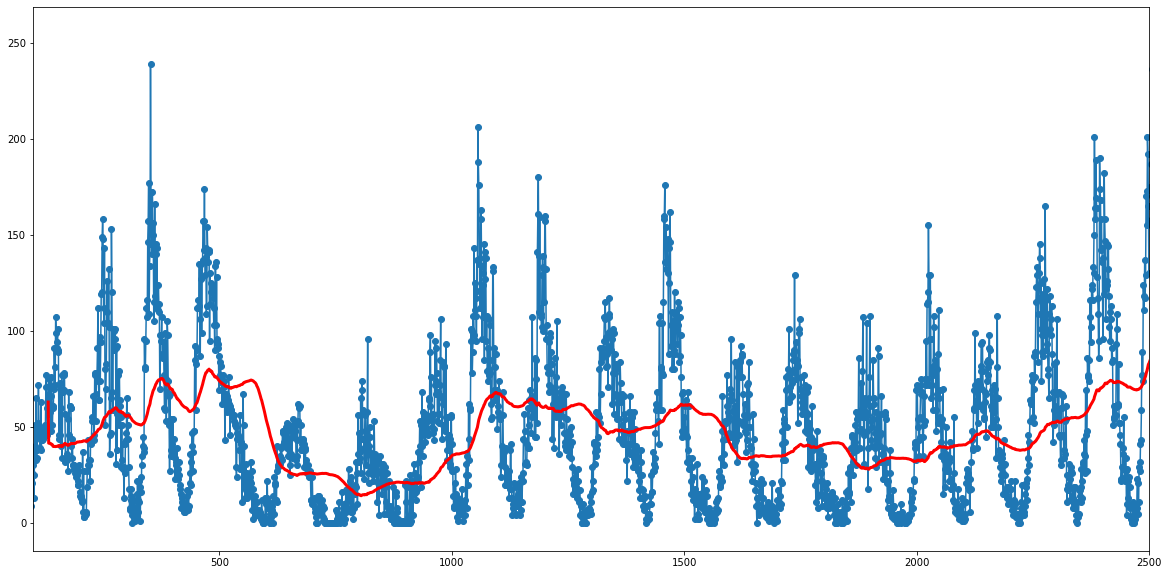

In [33]:
def moving_average(series, windowsize):
    result = [series[0]]
    for n in range(windowsize, len(series)):
        result.append(sum(series[n-i] for i in range(windowsize))/float(windowsize))
    return result 

windowsize = 132
Y_av = moving_average(Y,windowsize)


plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X[windowsize-1:], Y_av, c="red", linewidth=3)
plt.xlim(100,2500)
plt.show()

3073
3069


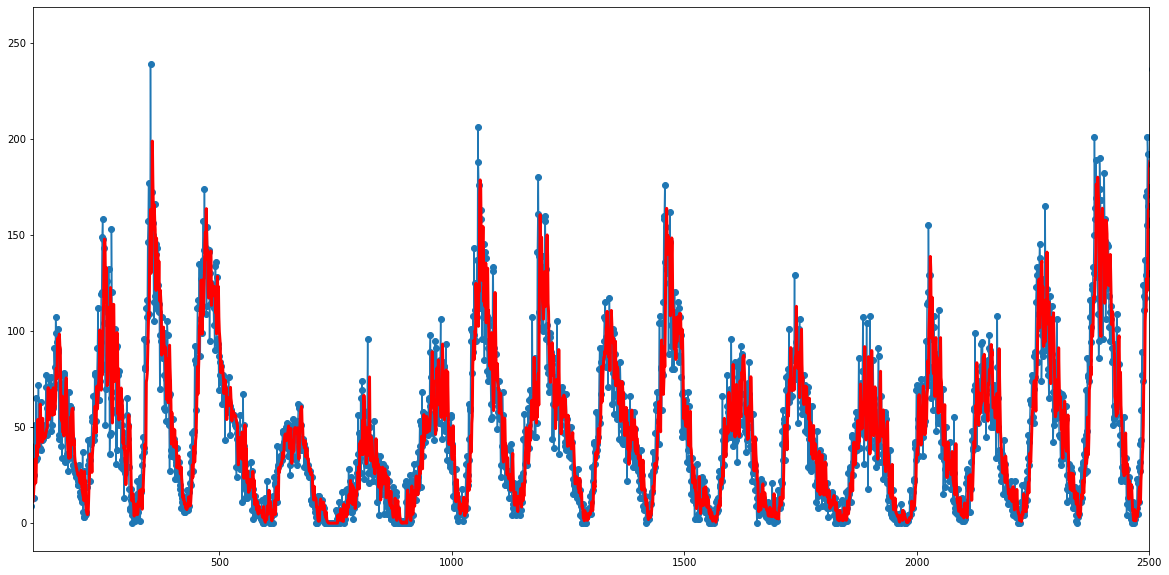

In [48]:
def weighted_average(series, weights):
    results = [series[0]]
    #weights.reverse()
    for n in range(0, len(series)-len(weights)):
        result = 0.0
        for k in range(len(weights)):
            result += series[n-k+1]*weights[k]
        results.append(result)
    return results
    
weights = [0.6, 0.2, 0.1, 0.07, 0.03]
Y_wa = weighted_average(Y, weights)

print(len(Y))
print(len(Y_wa))

plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X[len(weights)-1:], Y_wa, c="red", linewidth=3)
plt.xlim(100,2500)
plt.show()

In [51]:
import urllib.request
import json
import threading
 
def run_check():
    threading.Timer(10.0, run_check).start()
    url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus.json"
    req = urllib.request.Request(url)
    r = urllib.request.urlopen(req).read()
    data = json.loads(r.decode('utf-8'))
    print(data[0]['data']['GaragNumb'])
 
run_check()

2185
9710
2174
2746
2860
2459
3712
2170
2426
12390
2151
2159
9724
2414
4823
11640
4124
4219
2432
2707
4103
4181
17319
4111
9822
12389
2525
2467
4110
4821
4879
2132


In [50]:
import urllib.request
import json
import threading
url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus.json"
req = urllib.request.Request(url)
r = urllib.request.urlopen(req).read()
data = json.loads(r.decode('utf-8'))
print(data[0]['data']['GaragNumb'])


9724
